In [38]:
#librerias necesarias
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Cree una copia para su modificación. Esta puede ser descargada para ejecutar en su computador o modificarla desde google colab de acuerdo a su preferencia.
$$ $$
Utilice toda la información que se encuentra en el conjunto de datos online para los edificios de tipo retail. Es decir, descargue los archivos para los edificios 1 a 5 y a partir de estos cree un solo conjunto de datos (un único dataframe) en su notebook.
$$ $$
Primero se observa la información de cada cvs.

In [39]:
#edicio 1.
df1 = pd.read_csv('building1retail.csv', index_col=[0], parse_dates=True)
df1

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,47,285.8
2010-12-30 23:15:00,44,206.6
2010-12-30 23:30:00,44,205.9


In [40]:
#edicio 2.
df2 = pd.read_csv('building2retail.csv', index_col=[0], parse_dates=True)
df2

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,54,149.7
2010-01-01 01:30:00,54,150.4
2010-01-01 01:45:00,54,147.0
2010-01-01 02:00:00,54,147.1
2010-01-01 02:15:00,53,145.6
...,...,...
2010-12-30 23:00:00,48,287.3
2010-12-30 23:15:00,47,195.7
2010-12-30 23:30:00,47,188.0


In [41]:
#edicio 3.
df3 = pd.read_csv('building3retail.csv', index_col=[0], parse_dates=True)
df3

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,36,69.2
2010-01-01 01:30:00,36,70.3
2010-01-01 01:45:00,36,112.2
2010-01-01 02:00:00,36,112.8
2010-01-01 02:15:00,36,114.0
...,...,...
2010-12-30 23:00:00,37,266.1
2010-12-30 23:15:00,35,233.8
2010-12-30 23:30:00,35,232.2


In [42]:
#edicio 4.
df4 = pd.read_csv('building4retail.csv', index_col=[0], parse_dates=True)
df4

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,10,147.2
2010-01-01 01:30:00,10,147.1
2010-01-01 01:45:00,10,148.9
2010-01-01 02:00:00,10,143.3
2010-01-01 02:15:00,9,143.3
...,...,...
2010-12-30 23:00:00,48,165.1
2010-12-30 23:15:00,48,157.6
2010-12-30 23:30:00,48,166.8


In [43]:
#edicio 5.
df5 = pd.read_csv('building5retail.csv', index_col=[0], parse_dates=True)
df5

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,67,162.6
2010-01-01 01:30:00,67,156.5
2010-01-01 01:45:00,67,157.2
2010-01-01 02:00:00,67,151.0
2010-01-01 02:15:00,63,160.5
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


In [44]:
#se seleccionan las caracteristicas deseadas de cada dadaframe
values1 = df1[['OAT (F)','Power (kW)']]
values2 = df2[['OAT (F)','Power (kW)']]
values3 = df3[['OAT (F)','Power (kW)']]
values4 = df4[['OAT (F)','Power (kW)']]
values5 = df5[['OAT (F)','Power (kW)']]

In [45]:
#se concatenan todas las caracteristicas en un solo dataframe
values = [values1, values2, values3, values4, values5]

df = pd.concat(values)

df

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


Realice un análisis exploratorio de los datos similar al hecho en clase. Es posible extenderlo si lo considera necesario.

## Análisis exploratorio

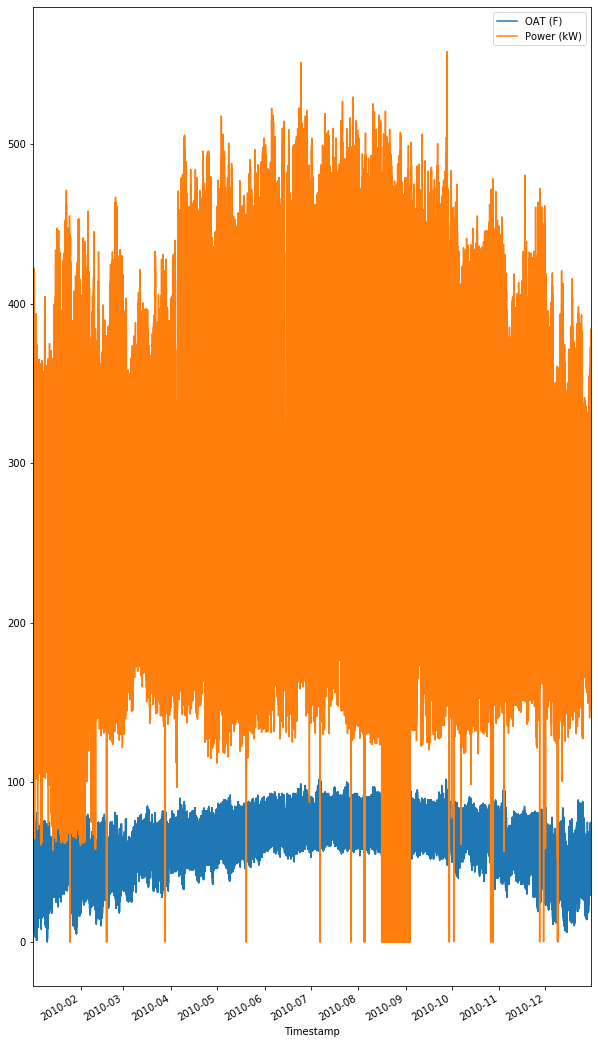

In [46]:
#graficar datos
df.plot(figsize= (10,20));

In [47]:
#isnull muestra datos false 
#values forma matriz con los elementos
#any muestra si alguno false
df.isnull().values.any()
#como la salida es false, no hay valores faltantes

False

Para ver el comportamiento de los datos, realizamos un histograma de los datos

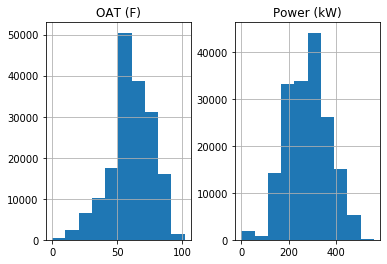

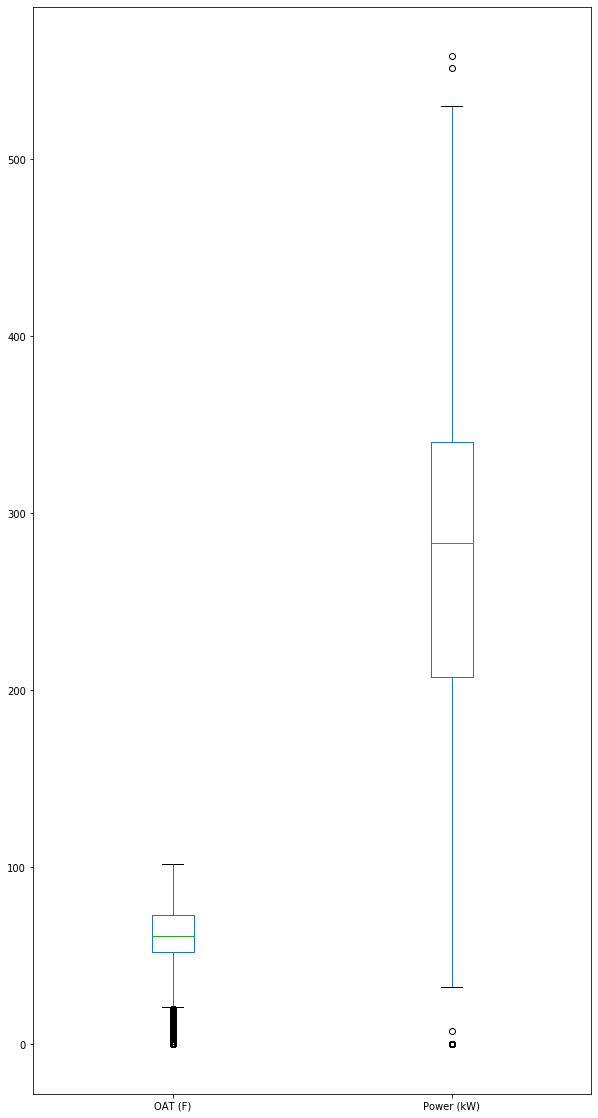

In [48]:
df.hist()
df.plot(kind = 'box', figsize = (10,20));

Limpiar los datos, regla de las tres desviaciones estandar $(\sigma)$ ya que si un dato se encuentra de las tres desviaciones estandar, se considera error.

In [49]:
std_dev = 1
outliers = (np.abs(stats.zscore(df)) < std_dev).any(axis=1)
df_limpio = df[ outliers]
df_limpio

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


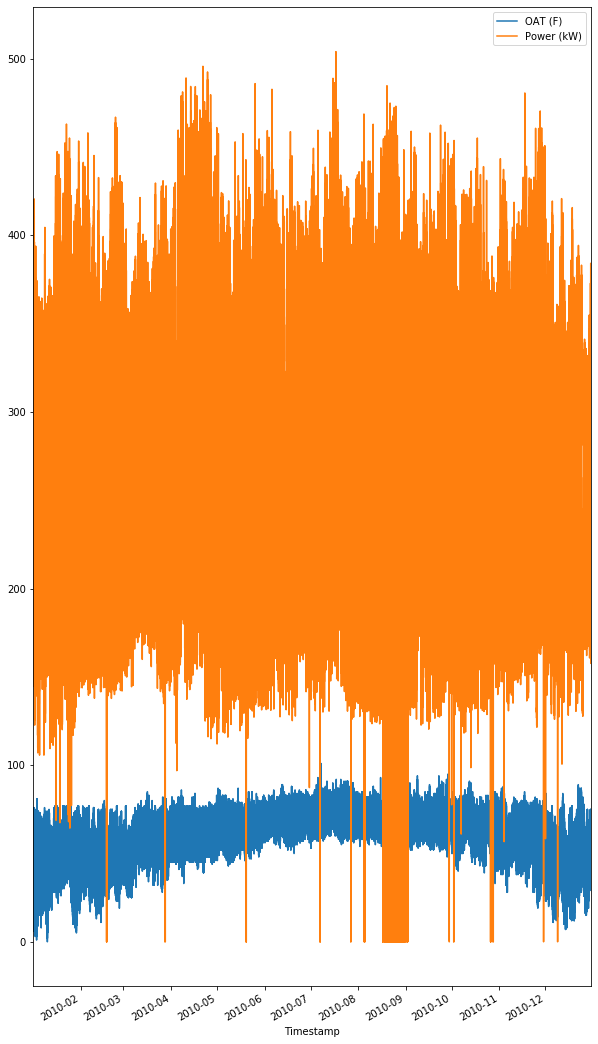

In [50]:
#graficamos los datos limpios
df_limpio.plot(figsize=(10,20));

Despues de hacer la limpieza, se valida la relación entre los datos

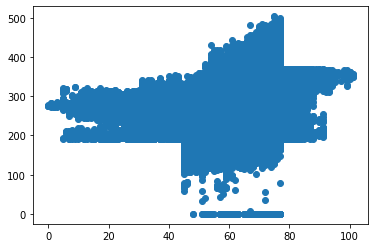

In [51]:
plt.scatter(df_limpio['OAT (F)'], df_limpio['Power (kW)']);

Se grafican la temperatura y la potencia para ciertos días partículares

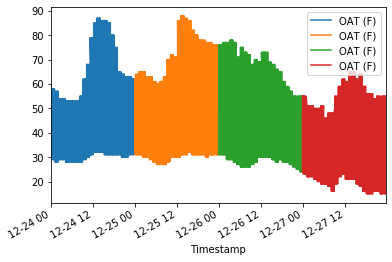

In [52]:
fig, ax = plt.subplots()
df.loc['2010-12-24', ['OAT (F)']].plot(ax=ax)
df.loc['2010-12-25', ['OAT (F)']].plot(ax=ax)
df.loc['2010-12-26', ['OAT (F)']].plot(ax=ax)
df.loc['2010-12-27', ['OAT (F)']].plot(ax=ax)

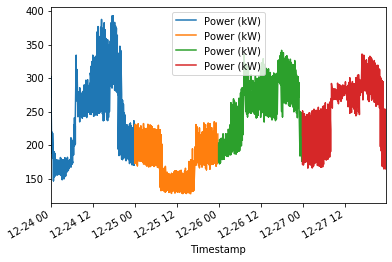

In [53]:
fig, ax = plt.subplots()
df.loc['2010-12-24', ['Power (kW)']].plot(ax=ax)
df.loc['2010-12-25', ['Power (kW)']].plot(ax=ax)
df.loc['2010-12-26', ['Power (kW)']].plot(ax=ax)
df.loc['2010-12-27', ['Power (kW)']].plot(ax=ax)

## Regresión lineal

In [54]:
#conjunto de variables dependientes y y conjunto de variables independientes X
X = pd.DataFrame(df['OAT (F)'])
y = pd.DataFrame(df['Power (kW)'])

#llama el atrivuto de la clase
linear_regresion = LinearRegression()
linear_regresion.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#se halla el coeficiente y el intercepto
m = linear_regresion.coef_
b = linear_regresion.intercept_

print('El intercepto es: ', b, 'El coeficiente es: ', m)

El intercepto es:  [109.47619451] El coeficiente es:  [[2.7912211]]


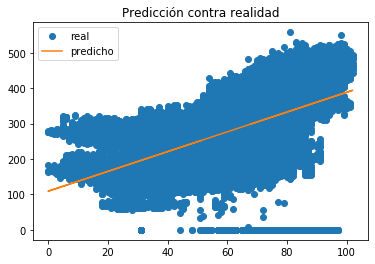

In [57]:
#se define y se grafica la recta predicha
y_pred = m * X + b

plt.plot(X.values.flatten(), y.values.flatten(),'o', label = 'real')
plt.plot(X.values.flatten(), y_pred, '-', label = 'predicho',);
plt.title('Predicción contra realidad')
plt.legend();

In [58]:
print('El puntaje R^2 es:', linear_regresion.score(X, y))

El puntaje R^2 es: 0.25780546714496055


Entrenemos el modelo para mejorar la predicción

In [59]:
#se hace lo mismo pero ahora con librería 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#llama el atrivuto de la clase
linear_regresion = LinearRegression()
linear_regresion.fit(X_train, y_train)

r2_1 = linear_regresion.score(X_test, y_test)
print('El puntaje R^2 es:', r2_1)

El puntaje R^2 es: 0.2517947537402493


Normalicemos los datos como una forma de limpiar los datos para ver si así podemos subir el puntaje $R^2$. Para ello, usamos la librería de sklearn.preprocessing StandardScaler

In [60]:
#se normalizan todos los datos para que uno no domine sobre otro
sc_X = StandardScaler()

X_trainN = sc_X.fit_transform(X_train) 
X_testN = sc_X.fit_transform(X_test) 

sc_y =StandardScaler()

y_trainN = sc_y.fit_transform(y_train) 
y_testN = sc_y.fit_transform(y_test) 


In [61]:
#se hace el mismo analisis pero con datos normalizados
#llama el atrivuto de la clase
linear_regresion = LinearRegression()
linear_regresion.fit(X_trainN, y_trainN)

r2_1 = linear_regresion.score(X_testN, y_testN)
print('El puntaje R^2 es:', r2_1)

El puntaje R^2 es: 0.2518321808668823


## Agregar predictores 

In [63]:
#agregando la hora 
df['hour'] = df.index.hour
df

,OAT (F),Power (kW),hour
Timestamp,,,
2010-01-01 01:15:00,51,165.1,1
2010-01-01 01:30:00,51,151.6,1
2010-01-01 01:45:00,51,146.9,1
2010-01-01 02:00:00,51,153.7,2
2010-01-01 02:15:00,51,153.8,2
...,...,...,...
2010-12-30 23:00:00,67,333.7,23
2010-12-30 23:15:00,68,221.0,23
2010-12-30 23:30:00,68,235.7,23


In [64]:
#regresion lineal agregando un predictor de hora
X = pd.DataFrame(df[['OAT (F)','hour']])
y = pd.DataFrame(df['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_regresion = LinearRegression()
linear_regresion.fit(X_train, y_train)

r2_2 = linear_regresion.score(X_test, y_test)

print('El puntaje R^2 con adción de una caracteristica es:', r2_2)

El puntaje R^2 con adción de una caracteristica es: 0.47090244247892143


In [65]:
#se normalizan todos los datos
sc_X = StandardScaler()

X_trainN = sc_X.fit_transform(X_train) 
X_testN = sc_X.fit_transform(X_test) 

sc_y =StandardScaler()

y_trainN = sc_y.fit_transform(y_train) 
y_testN = sc_y.fit_transform(y_test) 

#se hace el mismo analisis pero con datos normalizados
#llama el atrivuto de la clase
linear_regresion = LinearRegression()
linear_regresion.fit(X_trainN, y_trainN)

r2_1 = linear_regresion.score(X_testN, y_testN)
print('El puntaje R^2 es:', r2_1)
#se observa que normalizar los datos no es buena estrategia, no se seguirá haciendo

El puntaje R^2 es: 0.47091386925329765


Creamos una caracteristica que sea cuando las personas del edicio retail estan trabajando, adicionamos dos horarios, 8-12 y 14-18

In [66]:
#horario de la mañana
df['hour_open1'] = np.where((df.index.hour >=8) & (df.index.hour <12),1,0)

In [67]:
df

,OAT (F),Power (kW),hour,hour_open1
Timestamp,,,,
2010-01-01 01:15:00,51,165.1,1,0
2010-01-01 01:30:00,51,151.6,1,0
2010-01-01 01:45:00,51,146.9,1,0
2010-01-01 02:00:00,51,153.7,2,0
2010-01-01 02:15:00,51,153.8,2,0
...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0
2010-12-30 23:15:00,68,221.0,23,0
2010-12-30 23:30:00,68,235.7,23,0


In [68]:
#regresion lineal agregando dos predictores 
X = pd.DataFrame(df[['OAT (F)','hour', 'hour_open1']])
y = pd.DataFrame(df['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_regresion = LinearRegression()
linear_regresion.fit(X_train, y_train)

r2_3 = linear_regresion.score(X_test, y_test)

print('El puntaje R^2 con adción de una caracteristica es:', r2_3)

El puntaje R^2 con adción de una caracteristica es: 0.5015852859722939


Se adciona el horario de la tarde

In [69]:
#horario de la tarde
df['hour_open2'] = np.where((df.index.hour >=14) & (df.index.hour <18),1,0)

In [70]:
df

,OAT (F),Power (kW),hour,hour_open1,hour_open2
Timestamp,,,,,
2010-01-01 01:15:00,51,165.1,1,0,0
2010-01-01 01:30:00,51,151.6,1,0,0
2010-01-01 01:45:00,51,146.9,1,0,0
2010-01-01 02:00:00,51,153.7,2,0,0
2010-01-01 02:15:00,51,153.8,2,0,0
...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,0
2010-12-30 23:15:00,68,221.0,23,0,0
2010-12-30 23:30:00,68,235.7,23,0,0


In [71]:
#regresion lineal agregando tres predictores
X = pd.DataFrame(df[['OAT (F)','hour', 'hour_open1','hour_open2']])
y = pd.DataFrame(df['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_regresion = LinearRegression()
linear_regresion.fit(X_train, y_train)

r2_4 = linear_regresion.score(X_test, y_test)

print('El puntaje R^2 con adción de una caracteristica es:', r2_4)
#sube muy poco

El puntaje R^2 con adción de una caracteristica es: 0.5180355610420317


El score inicial fue de 0.2517947537402493 y el final fue de 0.5180355610420317 se logra incrementar dicho puntaje agragando predictores